In [1]:
from tensorflow.keras.utils import to_categorical
from keras_preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = r'C:\Face detection\archive (8)\images\images\train'
TEST_DIR = r'C:\Face detection\archive (8)\images\images\test'

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir, label)):
            image_paths.append(os.path.join(dir, label, imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths, labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)
print(train)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                                                   image     label
0      C:\Face detection\archive (8)\images\images\tr...     angry
1      C:\Face detection\archive (8)\images\images\tr...     angry
2      C:\Face detection\archive (8)\images\images\tr...     angry
3      C:\Face detection\archive (8)\images\images\tr...     angry
4      C:\Face detection\archive (8)\images\images\tr...     angry
...                                                  ...       ...
28816  C:\Face detection\archive (8)\images\images\tr...  surprise
28817  C:\Face detection\archive (8)\images\images\tr...  surprise
28818  C:\Face detection\archive (8)\images\images\tr...  surprise
28819  C:\Face detection\archive (8)\images\images\tr...  surprise
28820  C:\Face detection\archive (8)\images\images\tr...  surprise

[28821 rows x 2 columns]


In [5]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)
print(test)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
                                                  image     label
0     C:\Face detection\archive (8)\images\images\te...     angry
1     C:\Face detection\archive (8)\images\images\te...     angry
2     C:\Face detection\archive (8)\images\images\te...     angry
3     C:\Face detection\archive (8)\images\images\te...     angry
4     C:\Face detection\archive (8)\images\images\te...     angry
...                                                 ...       ...
7061  C:\Face detection\archive (8)\images\images\te...  surprise
7062  C:\Face detection\archive (8)\images\images\te...  surprise
7063  C:\Face detection\archive (8)\images\images\te...  surprise
7064  C:\Face detection\archive (8)\images\images\te...  surprise
7065  C:\Face detection\archive (8)\images\images\te...  surprise

[7066 rows x 2 columns]


In [6]:
from tqdm.notebook import tqdm

In [7]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [8]:
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\deepa\anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


  0%|          | 0/7066 [00:00<?, ?it/s]

In [9]:
x_train = train_features / 255.0
x_test = test_features / 255.0

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['label'])
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [11]:
# sequential model
model = Sequential()

# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# flattening
model.add(Flatten())

# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(7, activation='softmax'))

# model compilation
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [12]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
226/226 [==============================] - 36s 71ms/step - loss: 1.8241 - accuracy: 0.2450 - val_loss: 1.8110 - val_accuracy: 0.2583
Epoch 2/100
226/226 [==============================] - 13s 56ms/step - loss: 1.8057 - accuracy: 0.2518 - val_loss: 1.7595 - val_accuracy: 0.2680
Epoch 3/100
226/226 [==============================] - 13s 56ms/step - loss: 1.7202 - accuracy: 0.2963 - val_loss: 1.6043 - val_accuracy: 0.3518
Epoch 4/100
226/226 [==============================] - 13s 56ms/step - loss: 1.5908 - accuracy: 0.3710 - val_loss: 1.4579 - val_accuracy: 0.4370
Epoch 5/100
226/226 [==============================] - 13s 57ms/step - loss: 1.4974 - accuracy: 0.4191 - val_loss: 1.4006 - val_accuracy: 0.4567
Epoch 6/100
226/226 [==============================] - 13s 57ms/step - loss: 1.4378 - accuracy: 0.4428 - val_loss: 1.3005 - val_accuracy: 0.4950
Epoch 7/100
226/226 [==============================] - 13s 56ms/step - loss: 1.3933 - accuracy: 0.4631 - val_loss: 1.2919 - val_ac

In [13]:
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")




In [14]:
from keras.models import model_from_json
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [15]:
label = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
def ef(image):
    img = load_img(image, grayscale=True)
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

In [17]:
image = r'C:\Face detection\archive (8)\images\images\train\sad\42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of sad
model prediction is  sad


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
model prediction is  sad


C:\Users\deepa\anaconda3\envs\tf-gpu\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


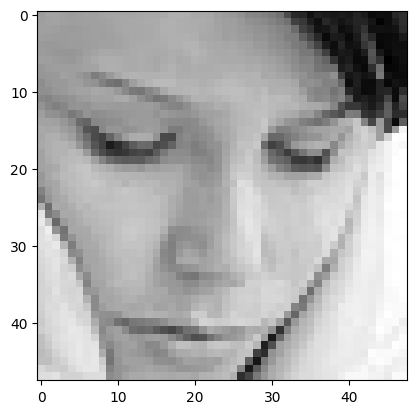

In [19]:
image = r'C:\Face detection\archive (8)\images\images\train\sad\42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

In [21]:
image = r'C:\Face detection\archive (8)\images\train\angry\263.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of angry
model prediction is  angry


original image is of angry
model prediction is  angry


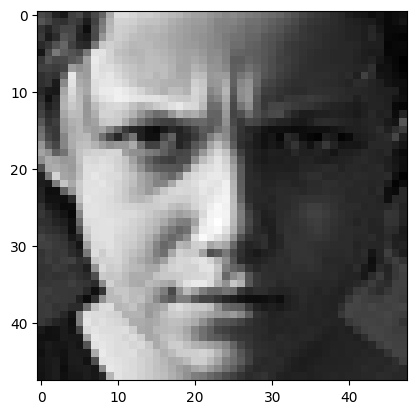

In [22]:
image = r'C:\Face detection\archive (8)\images\train\angry\263.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

In [24]:
image = r'C:\Face detection\archive (8)\images\images\train\happy\324.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of happy
model prediction is  happy


original image is of happy
model prediction is  happy


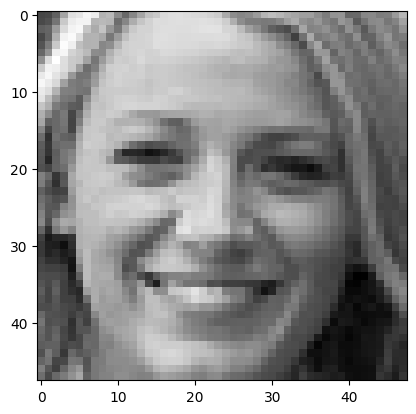

In [25]:
image = r'C:\Face detection\archive (8)\images\images\train\happy\324.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

In [26]:

image = r'C:\Face detection\archive (8)\images\images\train\surprise\362.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of surprise
model prediction is  surprise


original image is of surprise
model prediction is  surprise


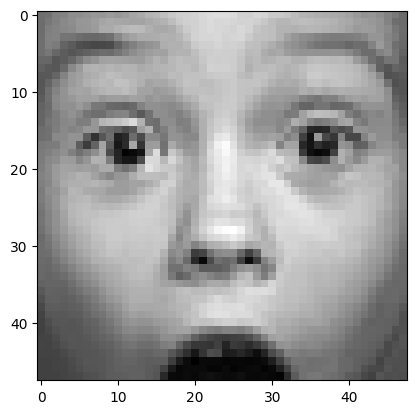

In [27]:
image = r'C:\Face detection\archive (8)\images\images\train\surprise\362.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

In [28]:

image = r"C:\Face detection\archive (8)\images\images\train\fear\599.jpg"
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of fear
model prediction is  fear


original image is of fear
model prediction is  fear


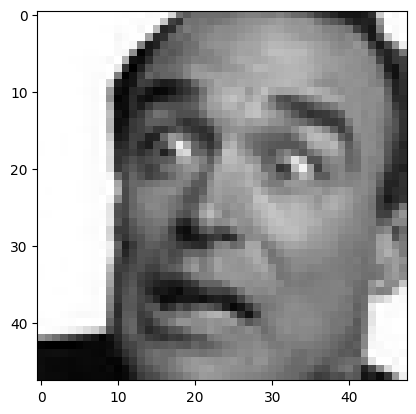

In [29]:
image = r"C:\Face detection\archive (8)\images\images\train\fear\599.jpg"
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

In [30]:

image = r"C:\Face detection\archive (8)\images\images\train\neutral\274.jpg"
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of neutral
model prediction is  neutral


original image is of neutral
model prediction is  neutral


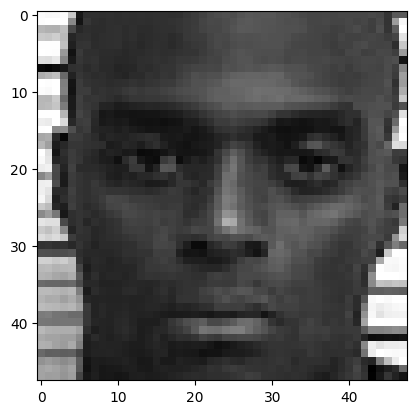

In [31]:
image = r"C:\Face detection\archive (8)\images\images\train\neutral\274.jpg"
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')

In [32]:
image = r"C:\Face detection\archive (8)\images\images\train\disgust\5964.jpg"
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)

original image is of disgust
model prediction is  disgust


original image is of disgust
model prediction is  disgust


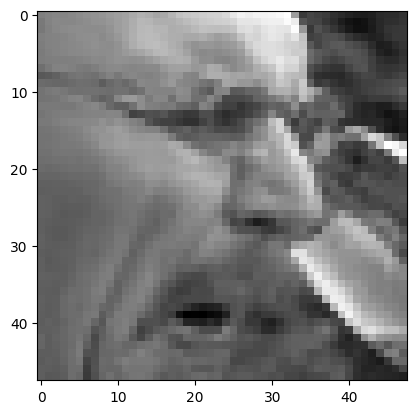

In [33]:
image = r"C:\Face detection\archive (8)\images\images\train\disgust\5964.jpg"
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ", pred_label)
plt.imshow(img.reshape(48, 48), cmap='gray')